# Loading libraries

In [1847]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [1848]:
# Loading the dataset to pandas dataframe
df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Understanding Data

In [1849]:
# It will show first rows
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S


In [1850]:
df.shape

(891, 12)

In [1851]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1852]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1853]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning
## Duplicate Data Treat

In [1854]:
# Function to detect duplicate rows
def detect_duplicates(dataframe):
    duplicate_rows = dataframe[dataframe.duplicated()]
    return duplicate_rows

# Function to remove duplicate rows
def remove_duplicates(dataframe):
    dataframe_no_duplicates = dataframe.drop_duplicates()
    return dataframe_no_duplicates

# Example usage
# Display duplicate rows
duplicate_rows = detect_duplicates(df)
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows
df = remove_duplicates(df)
print("\nDataFrame after Removing Duplicates:")
print(df)

print(df.duplicated())

Duplicate Rows:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

DataFrame after Removing Duplicates:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily 

## Variable Identification

In [1855]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])
X_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [1856]:
nominal_columns = ["Sex", "Embarked", "Cabin"]
ordinal_columns = ["Pclass"]
discrete_columns = ["SibSp", "Parch"]
ratio_columns = ["Age", "Fare"]

continuous_columns = ['SibSp', 'Parch', 'Age', 'Fare']
categorical_columns = ["Sex", "Embarked", "Cabin", "Pclass"]

### Univariate Analysis

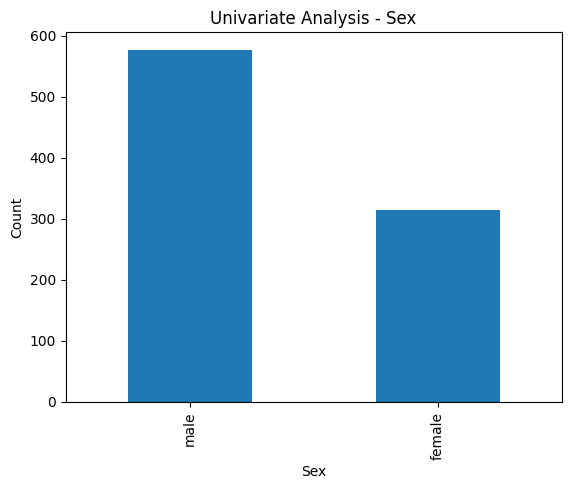

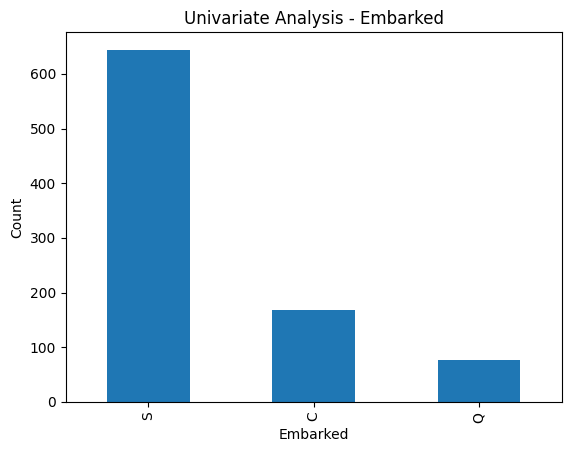

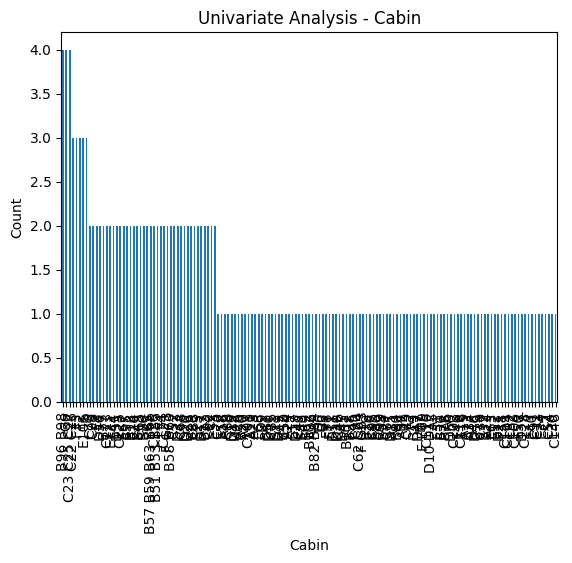

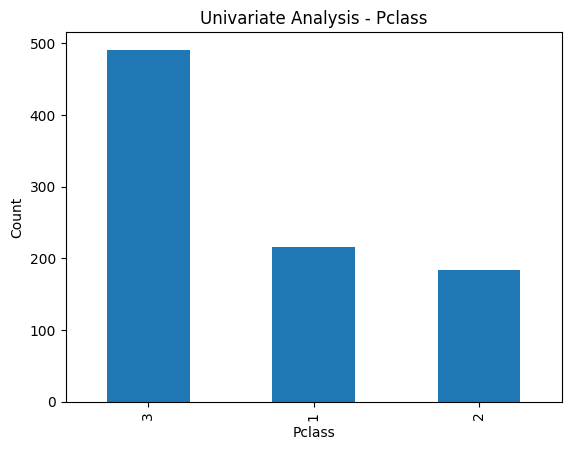

In [1857]:
# Function for univariate analysis of categorical variables
def analyze_categorical_variable(column_name):
    # Frequency table
    frequency_table = df[column_name].value_counts()

    # Percentage of values under each category
    percentage_table = df[column_name].value_counts(normalize=True) * 100

    # Combine count and percentage into a single DataFrame
    summary_df = pd.DataFrame({'Count': frequency_table, 'Count%': percentage_table})

    # Bar chart
    summary_df.plot(kind='bar', y='Count', legend=False)
    plt.title(f'Univariate Analysis - {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

for column in categorical_columns:
    analyze_categorical_variable(column)

In [1858]:
# sns.pairplot(df,hue="Survived",size=3)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
10.79935154009228


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


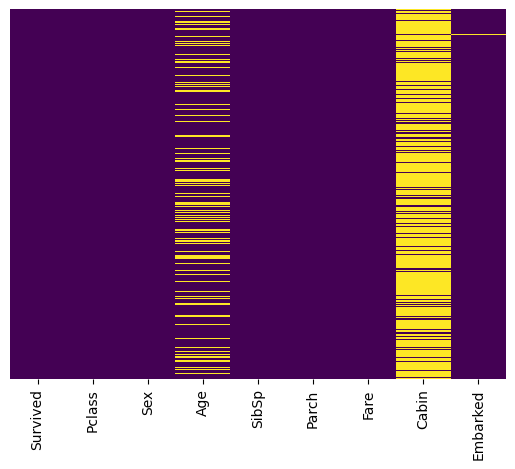

In [1859]:
def check_missing_values(df):
    df.replace("?", np.nan, inplace = True)
    
    missing_values_count = df.isnull().sum()
    print(missing_values_count)
    
    # how many total missing values do we have?
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()

    # percent of data that is missing
    percent_missing = (total_missing/total_cells) * 100
    print(percent_missing)
    
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    
    return df

check_missing_values(df)

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64
12.380382775119617


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


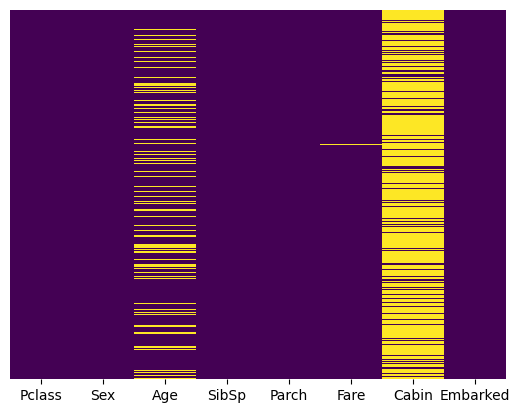

In [1860]:
check_missing_values(X_test)

We will see how to figure out age to fill null.
Cabin has too much so drop
Embarked can be imputed as well

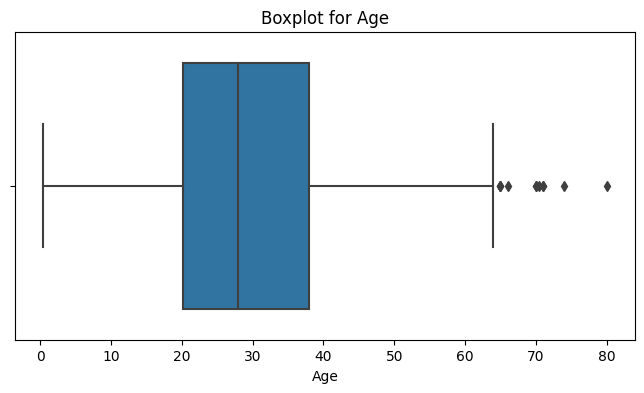

<Figure size 800x400 with 0 Axes>

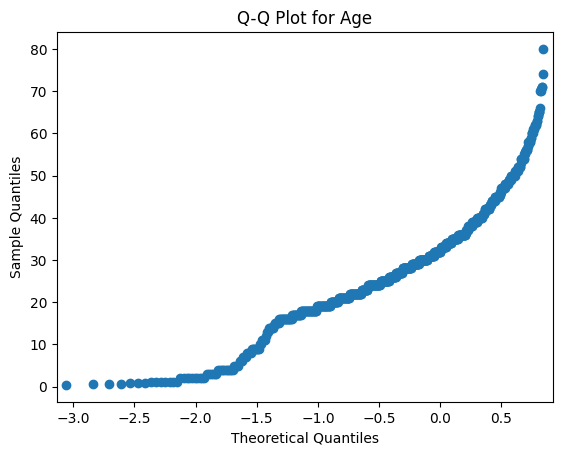

Shapiro-Wilk test for Age:
Statistic: nan, p-value: 1.0
The data for Age appears to be normally distributed.


In [1861]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skew

# Function to check for outliers using box plots
def check_outliers(df, column_name):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot for {column_name}')
    plt.show()

# Function to check for normality using Q-Q plot and Shapiro-Wilk test
def check_normality(df, column_name):
    # Q-Q plot
    plt.figure(figsize=(8, 4))
    qqplot(df[column_name], line='s')
    plt.title(f'Q-Q Plot for {column_name}')
    plt.show()

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(df[column_name])
    print(f'Shapiro-Wilk test for {column_name}:')
    print(f'Statistic: {stat}, p-value: {p_value}')
    if p_value > 0.05:
        print(f'The data for {column_name} appears to be normally distributed.')
    else:
        print(f'The data for {column_name} does not appear to be normally distributed.')
        
        
def check_skewness(data, column_name, skew_threshold=0.5):
    # Extract the column
    column_data = data[column_name]
    
    # Calculate skewness
    skewness = skew(column_data)
    
    # Print the skewness value
    print(f"Skewness of '{column_name}': {skewness:.2f}")

    # Check if the skewness exceeds the threshold
    if np.abs(skewness) > skew_threshold:
        print(f"The distribution of '{column_name}' is skewed.")
    else:
        print(f"The distribution of '{column_name}' is approximately symmetric.")

# Example usage for a specific column
column_of_interest = ['Age']

for col in column_of_interest:
    check_outliers(df, col)
    check_normality(df, col)

Since outliers are minimal and data is normally distributed we can consider mean imputation

Now let's check age according to sex and Pclass

<Axes: xlabel='Sex', ylabel='Age'>

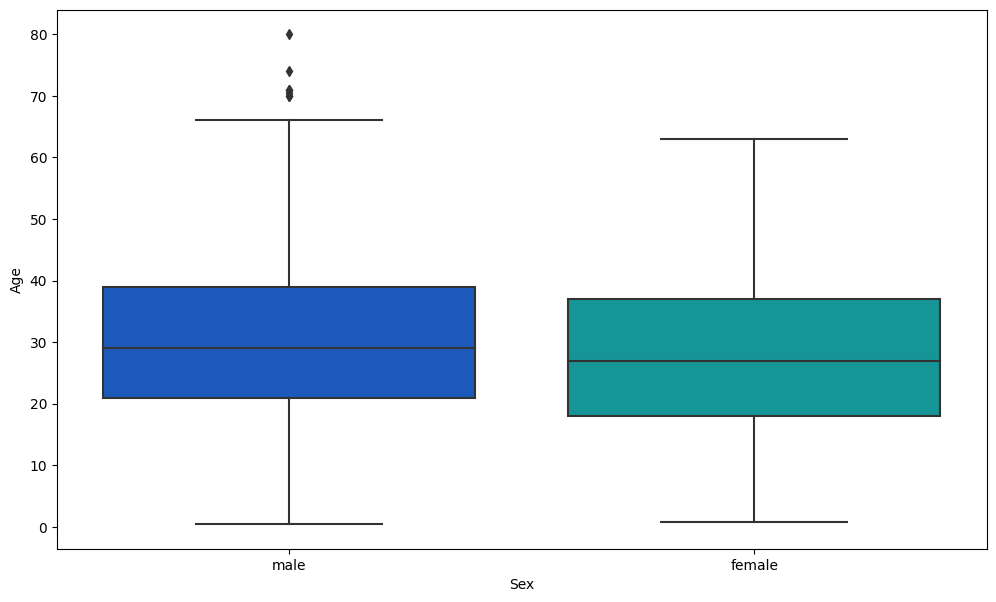

In [1862]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',data=df,palette='winter')

<Axes: xlabel='Pclass', ylabel='Age'>

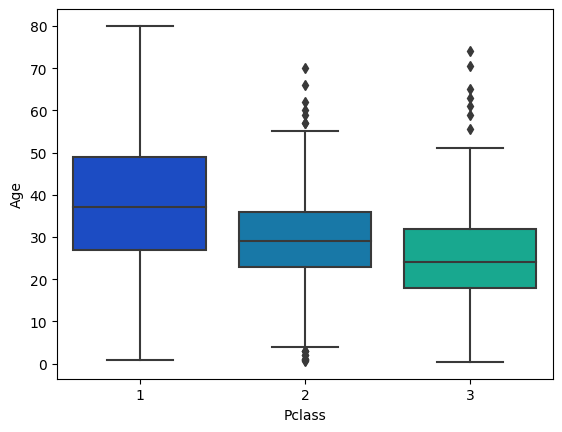

In [1863]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

Since between sex and pclass the age mean has significant difference. Hence we will use mean according to pclass

In [1864]:
def impute_age(cols):
    targetted_column = cols[0]
    category_column_name = cols[1]

    if pd.isnull(targetted_column):
        if category_column_name == 1:
            return 37
        elif category_column_name == 2:
            return 29
        else:
            return 26
    else:
        return targetted_column
    
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

df['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [1865]:
X_test['Age'] = X_test[['Age','Pclass']].apply(impute_age,axis=1)

X_test['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

In [1866]:
print(df['Age'].unique())

[22.   38.   26.   35.   54.    2.   27.   14.    4.   58.   20.   39.
 55.   29.   31.   34.   15.   28.    8.   19.   40.   37.   66.   42.
 21.   18.    3.    7.   49.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]


In [1867]:
column_to_drop = ['Cabin']
df.drop(columns=column_to_drop, errors='ignore', inplace=True)
X_test.drop(columns=column_to_drop, errors='ignore', inplace=True)

Text(0.5, 1.0, 'Before Imputation')

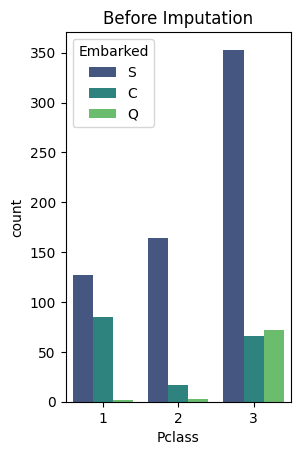

In [1868]:
plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', hue='Embarked', data=df, palette='viridis')
plt.title('Before Imputation')

All classes use S

In [1869]:
df['Embarked'] = df['Embarked'].fillna('S')
X_test['Fare'] = X_test['Fare'].fillna(df['Fare'].mean())

<Axes: >

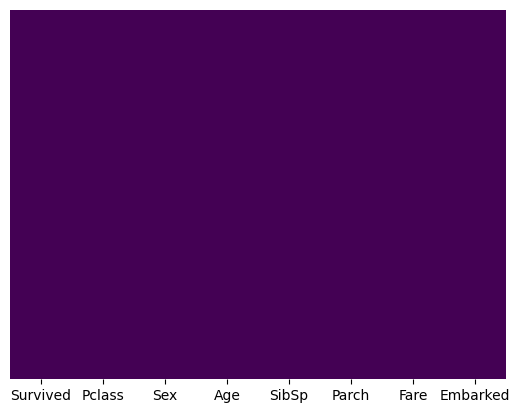

In [1870]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

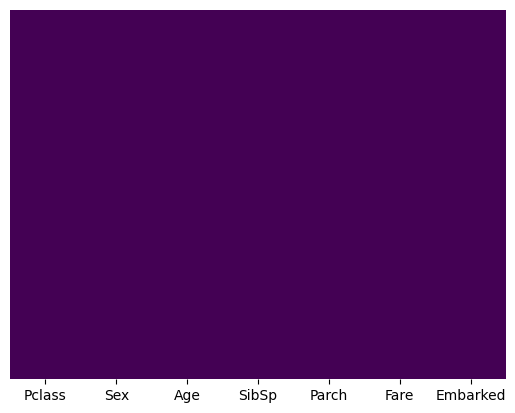

In [1871]:
sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Outliers
https://www.kaggle.com/code/aimack/how-to-handle-outliers

Applied Capping method for 'Age' based on Interquartile Range.
Outliers Before Treatment in 'Age': True
Outliers After Treatment in 'Age': False


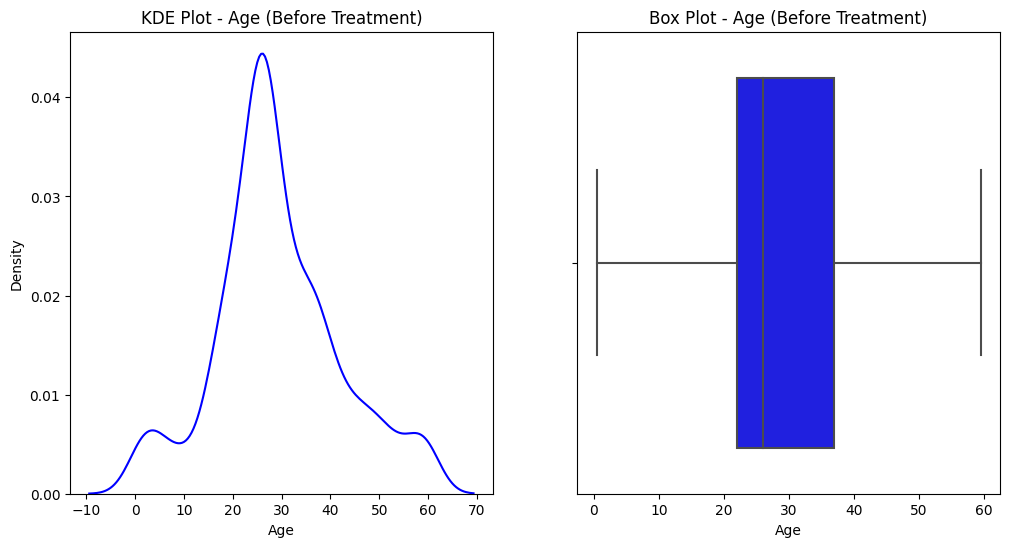

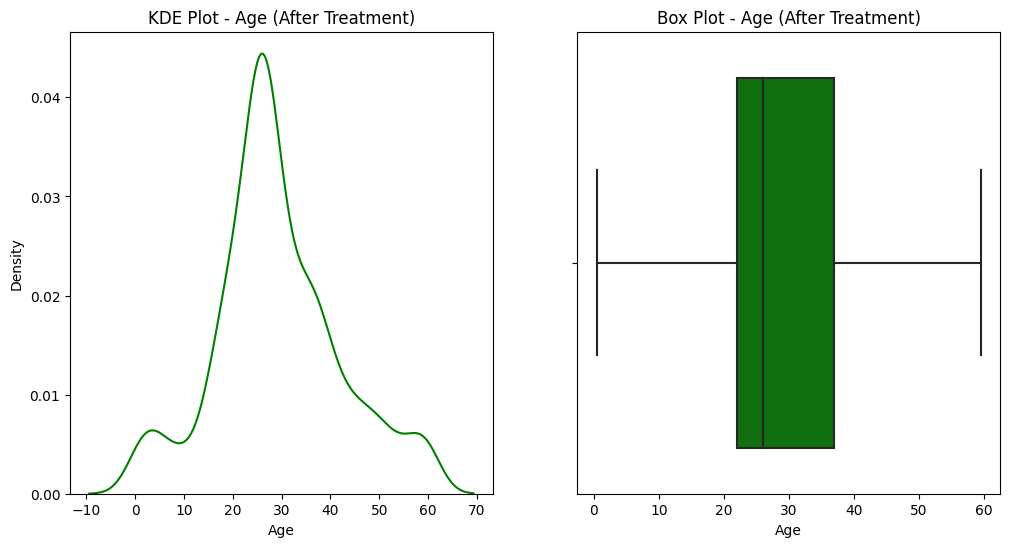

Applied Capping method for 'SibSp' based on Interquartile Range.
Outliers Before Treatment in 'SibSp': True
Outliers After Treatment in 'SibSp': False


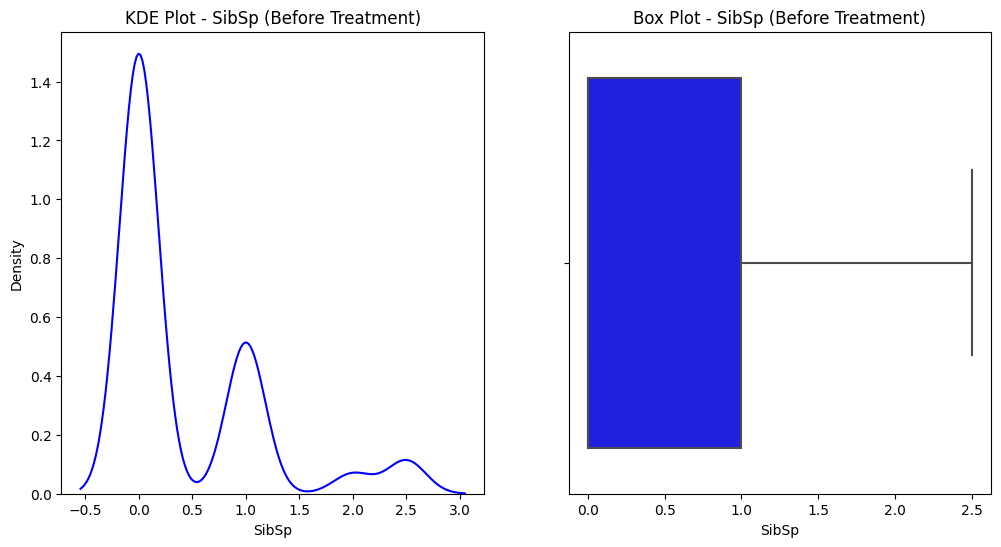

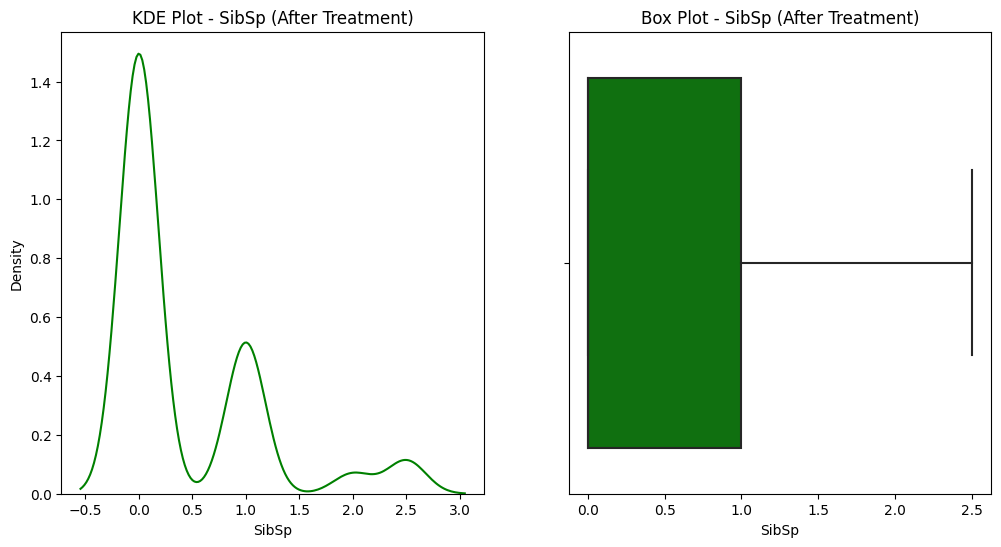

Applied Capping method for 'Parch' based on Interquartile Range.
Outliers Before Treatment in 'Parch': True
Outliers After Treatment in 'Parch': False


/tmp/ipykernel_47/2932903785.py:74: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], label='Before Treatment', color='blue')


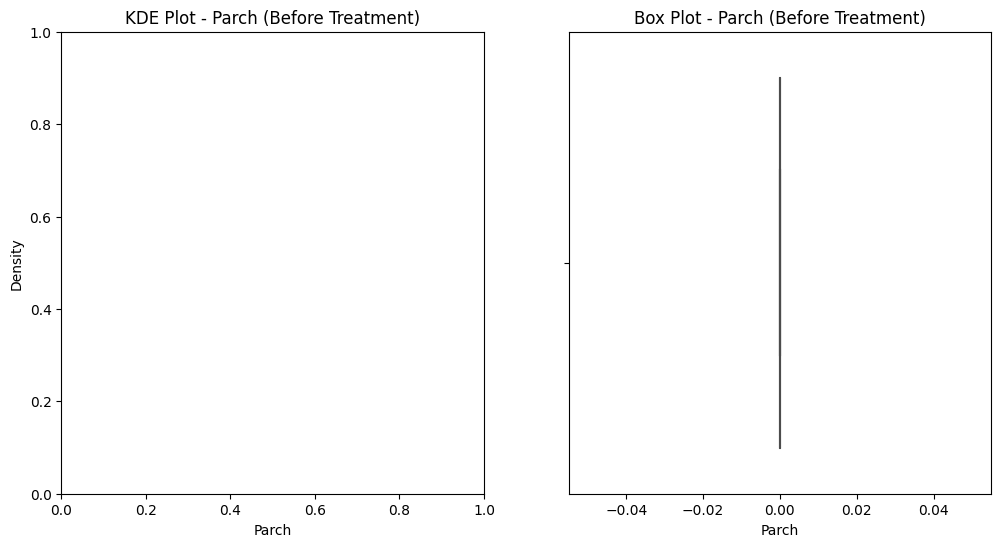

/tmp/ipykernel_47/2932903785.py:89: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], label='After Treatment', color='green')


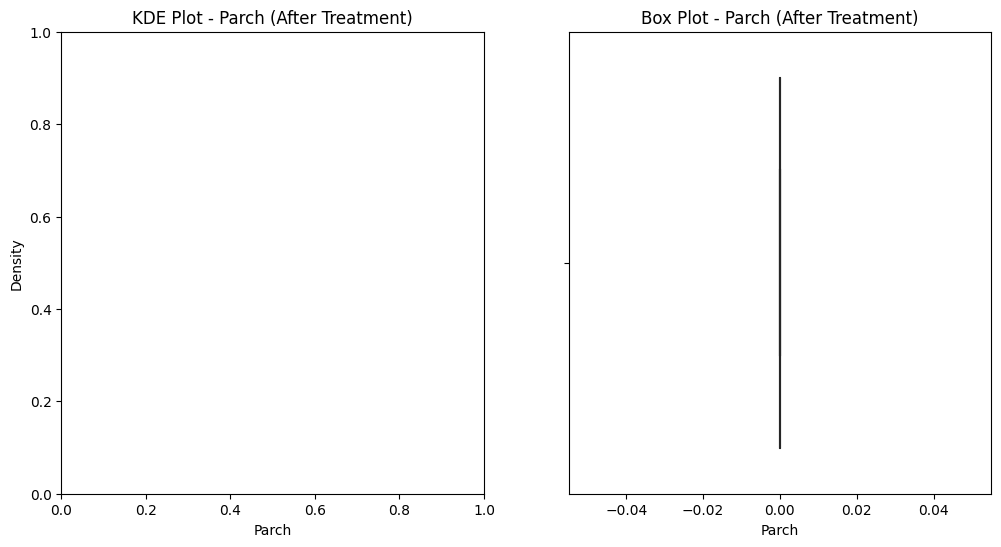

Applied Capping method for 'Fare' based on Interquartile Range.
Outliers Before Treatment in 'Fare': True
Outliers After Treatment in 'Fare': False


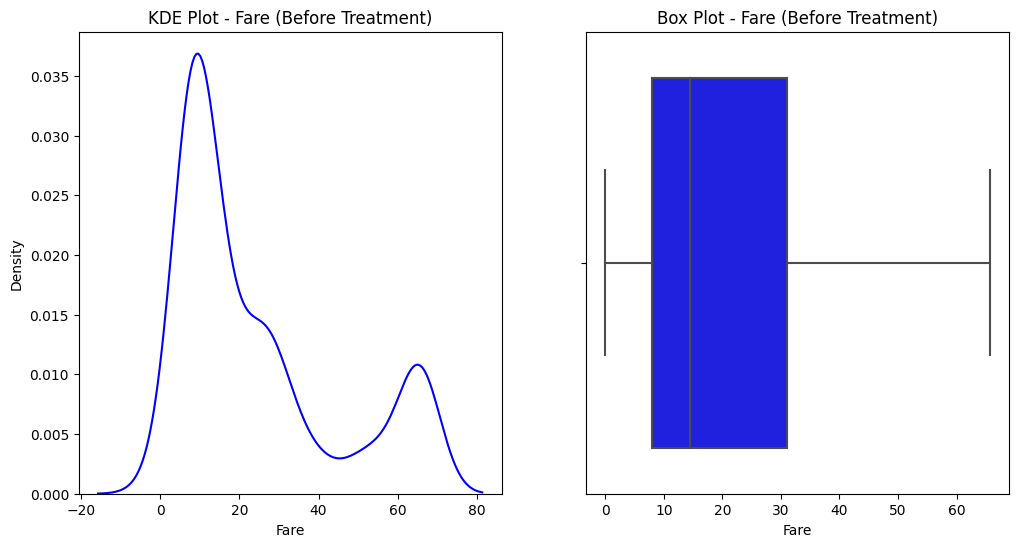

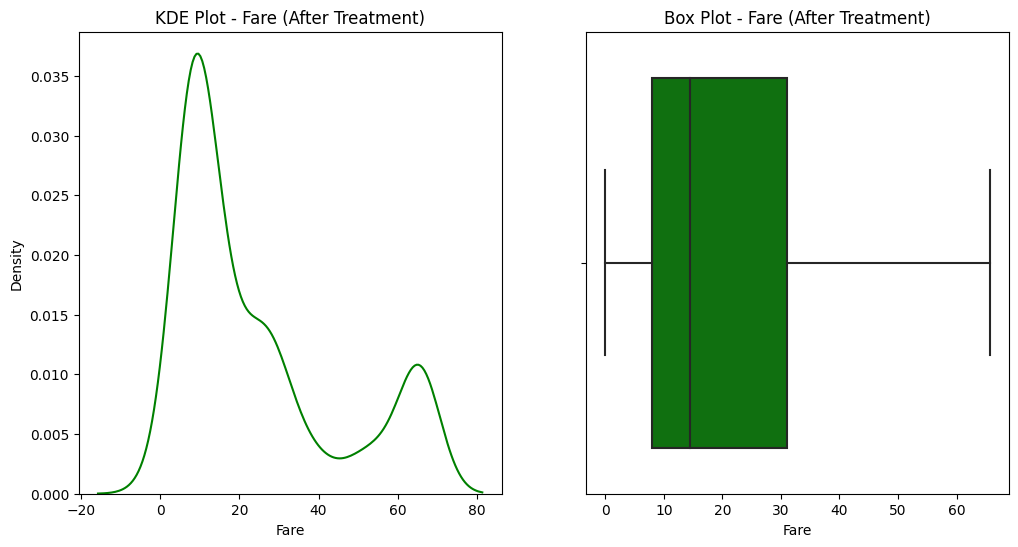

In [1872]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function for outlier treatment
def outlier_treatment(data, column_name, std_dev_threshold=3, iqr_threshold=1.5):
    # Extract the column
    column_data = data[column_name]
    
    # Calculate mean and standard deviation
    mean_val = np.mean(column_data)
    std_dev = np.std(column_data)
    
    # Calculate lower and upper bounds based on standard deviation
    lower_bound_std = mean_val - std_dev_threshold * std_dev
    upper_bound_std = mean_val + std_dev_threshold * std_dev
    
    # Calculate lower and upper bounds based on interquartile range (IQR)
    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - iqr_threshold * IQR
    upper_bound_iqr = Q3 + iqr_threshold * IQR
    
    # Identify outliers before treatment
    outliers_before = any(((column_data < lower_bound_std) | (column_data > upper_bound_std)) | ((column_data < lower_bound_iqr) | (column_data > upper_bound_iqr)))
    
    # Apply Trimming, Capping, or Percentile method based on conditions
    if any((column_data < lower_bound_std) | (column_data > upper_bound_std)):
        # Apply Trimming, Capping, or Percentile method based on conditions
        if any((column_data < lower_bound_iqr) | (column_data > upper_bound_iqr)):
            # Capping method
            column_data = np.where(column_data > upper_bound_iqr, upper_bound_iqr, np.where(column_data < lower_bound_iqr, lower_bound_iqr, column_data))
            print(f"Applied Capping method for '{column_name}' based on Interquartile Range.")
#             # Apply Percentile method
#             percentile_value = np.percentile(column_data, [5, 95])
#             column_data = np.clip(column_data, percentile_value[0], percentile_value[1])
#             print(f"Applied Percentile method for '{column_name}'.")
        else:
            # Apply Trimming method
            column_data = data[(data[column_name] > lower_bound_std) & (data[column_name] < upper_bound_std)][column_name]
            print(f"Applied Trimming method for '{column_name}' based on Standard Deviation.")
    elif any((column_data < lower_bound_iqr) | (column_data > upper_bound_iqr)):
        # Capping method
        column_data = np.where(column_data > upper_bound_iqr, upper_bound_iqr, np.where(column_data < lower_bound_iqr, lower_bound_iqr, column_data))
        print(f"Applied Capping method for '{column_name}' based on Interquartile Range.")
    else:
        print(f"No outlier treatment needed for '{column_name}'.")
    
    # Identify outliers after treatment
    outliers_after = any(((column_data < lower_bound_std) | (column_data > upper_bound_std)) | ((column_data < lower_bound_iqr) | (column_data > upper_bound_iqr)))

    # Assign the modified column data back to the DataFrame
    data[column_name] = column_data

    return data, outliers_before, outliers_after

# List of columns to check for outliers
outlier_check_col = ['Age', 'SibSp', 'Parch', 'Fare']

# Loop through each column and apply outlier treatment
for col in outlier_check_col:
    # Call the function for each column
    df, outliers_before, outliers_after = outlier_treatment(df, col)
    
    # Print information about outliers before and after treatment
    print(f"Outliers Before Treatment in '{col}': {outliers_before}")
    print(f"Outliers After Treatment in '{col}': {outliers_after}")

    # Plot KDE and box plots before and after treatment
    plt.figure(figsize=(12, 6))
    
    # KDE Plot before treatment
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[col], label='Before Treatment', color='blue')
    plt.title(f'KDE Plot - {col} (Before Treatment)')
    
    # Box Plot before treatment
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Box Plot - {col} (Before Treatment)')

    plt.show()

    # Plot KDE and box plots after treatment
    plt.figure(figsize=(12, 6))
    
    # KDE Plot after treatment
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[col], label='After Treatment', color='green')
    plt.title(f'KDE Plot - {col} (After Treatment)')
    
    # Box Plot after treatment
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Box Plot - {col} (After Treatment)')

    plt.show()


Sometimes percentile doesnt handle all

## Encoding

In [1873]:
# List of nominal columns for one-hot encoding
nominal_columns = ["Sex", "Embarked"]

# Function to apply one-hot encoding to nominal columns
def apply_one_hot_encoding(dataframe, column_name):
    one_hot_encoded = pd.get_dummies(dataframe[column_name], prefix=column_name, drop_first=True)
    dataframe = pd.concat([dataframe, one_hot_encoded], axis=1)
    dataframe.drop(column_name, axis=1, inplace=True)
    return dataframe

# Example usage for each column in nominal_columns list
for column in nominal_columns:
    df = apply_one_hot_encoding(df, column)
    X_test = apply_one_hot_encoding(X_test, column)

# Display the updated DataFrame with one-hot encoded columns
print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0    1.0    0.0   7.2500      True       False   
1         1       1  38.0    1.0    0.0  65.6344     False       False   
2         1       3  26.0    0.0    0.0   7.9250     False       False   
3         1       1  35.0    1.0    0.0  53.1000     False       False   
4         0       3  35.0    0.0    0.0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [1874]:
from sklearn.preprocessing import LabelEncoder

# List of ordinal columns for label encoding
ordinal_columns = ['Pclass']

# Function to apply label encoding to ordinal columns
def label_encode_ordinal_columns(dataframe, ordinal_columns):
    encode = LabelEncoder()

    for column in ordinal_columns:
        # Check if the column exists in the DataFrame
        if column in dataframe.columns:
            # Extract the column for encoding
            column_data = dataframe[[column]]

            # Fit and transform using OrdinalEncoder
            encoded_data = encode.fit_transform(column_data)

            # Replace the original column with the encoded values
            dataframe[column] = encoded_data.astype(int)

# Example usage
label_encode_ordinal_columns(df, ordinal_columns)
label_encode_ordinal_columns(X_test, ordinal_columns)

# Display the DataFrame after label encoding
print(df.head())
print(X_test.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       2  22.0    1.0    0.0   7.2500      True       False   
1         1       0  38.0    1.0    0.0  65.6344     False       False   
2         1       2  26.0    0.0    0.0   7.9250     False       False   
3         1       0  35.0    1.0    0.0  53.1000     False       False   
4         0       2  35.0    0.0    0.0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       2  34.5      0      0   7.8292      True        True       False
1       2  47.0      1      0   7.0000     False       False        True
2       1  62.0      0      0   9.6875      True        True       False
3       2  27.0      0      0   8.6625      True       False        True
4       2  22.0      1      1  12.2875     False       False        True


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1875]:
X_train = df.drop(columns=['Survived'])
Y_train = df['Survived']

In [1876]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [1877]:
# X = np.asarray(X_train)
# Y = np.asarray(Y_train)

# # list of models
# models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

# def compare_models_cross_validation():

#     for model in models:

#         cv_score = cross_val_score(model, X, Y, cv=5)
#         mean_accuracy = sum(cv_score)/len(cv_score)
#         mean_accuracy = mean_accuracy*100
#         mean_accuracy = round(mean_accuracy, 2)

#         print('Cross Validation accuracies for the',model,'=', cv_score)
#         print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
#         print('---------------------------------------------------------------')
        
        
# compare_models_cross_validation()


# # list of models
# models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

# # creating a dictionary that contains hyperparameter values for the above mentioned models


# model_hyperparameters = {
    

#     'log_reg_hyperparameters': {
        
#         'C' : [1,5,10,20]
#     },

#     'svc_hyperparameters': {
        
#         'kernel' : ['linear','poly','rbf','sigmoid'],
#         'C' : [1,5,10,20]
#     },


#     'KNN_hyperparameters' : {
        
#         'n_neighbors' : [3,5,10]
#     },


#     'random_forest_hyperparameters' : {
        
#         'n_estimators' : [10, 20, 50, 100]
#     }
# }

# model_keys = list(model_hyperparameters.keys())
# print(model_keys)

# def ModelSelection(list_of_models, hyperparameters_dictionary):

#     result = []

#     i = 0

#     for model in list_of_models:

#         key = model_keys[i]

#         params = hyperparameters_dictionary[key]

#         i += 1

#         print(model)
#         print(params)
#         print('---------------------------------')


#         classifier = GridSearchCV(model, params, cv=5)

#         # fitting the data to classifier
#         classifier.fit(X,Y)

#         result.append({
#             'model used' : model,
#             'highest score' : classifier.best_score_,
#             'best hyperparameters' : classifier.best_params_
#         })

#         result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

#     return result_dataframe

# ModelSelection(models_list, model_hyperparameters)

In [1878]:
X_test['SibSp'] = X_test['SibSp'].astype(float)
X_test['Parch'] = X_test['Parch'].astype(float)
X_test['Fare'] = X_test['Fare'].astype(float)
print(X_train.dtypes)
print(X_test.dtypes)

Pclass          int64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object
Pclass          int64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [1879]:
# Get the best model
model = RandomForestClassifier(random_state=0, n_estimators=100)

model.fit(X_train, Y_train)

# Predict using the best model
Y_pred = model.predict(X_test)

In [1880]:
from sklearn.metrics import accuracy_score

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

0.9741863075196409


Text(95.72222222222221, 0.5, 'Y_train')

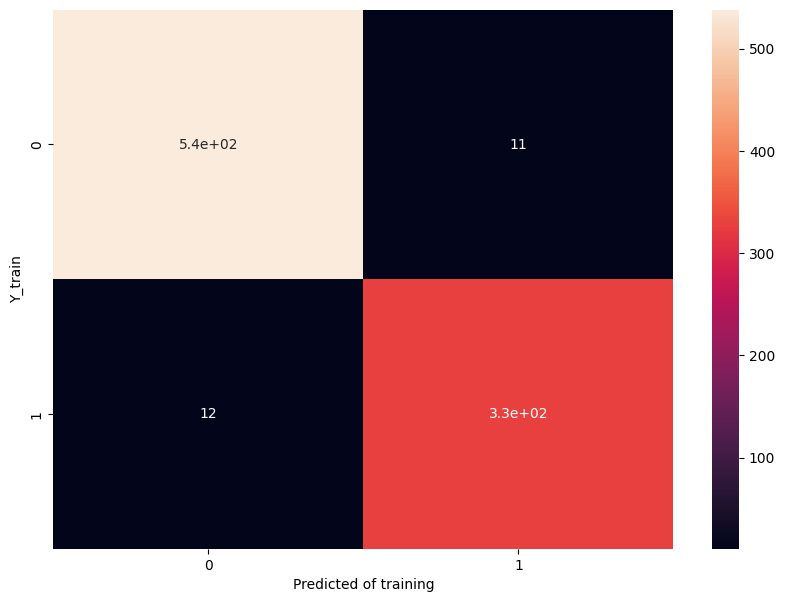

In [1881]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_train, X_train_prediction)


plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted of training")
plt.ylabel("Y_train")

In [1882]:
from sklearn.metrics import precision_score, recall_score, f1_score
def precision_recall_f1_score(true_labels, pred_labels):

    precision_value = precision_score(true_labels, pred_labels)
    recall_value = recall_score(true_labels, pred_labels)
    f1_score_value = f1_score(true_labels, pred_labels)

    print('Precision =',precision_value)
    print('Recall =',recall_value)
    print('F1 Score =',f1_score_value)
    
# classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.967741935483871
Recall = 0.9649122807017544
F1 Score = 0.9663250366032212


In [1883]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':Y_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [1884]:
submission.to_csv('submission.csv', index=False)